

# Project: Investigate a Dataset - [TMDb Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Questions">Questions</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Data Limitation">Data Limitation</a></li>    
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv 
import datetime as datetime


<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.shape

(10866, 21)

In [3]:
df.head(2) #checking columns and first 2 raws

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
df.info() #checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.nunique() #checking unique values

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='wrangling'></a>
# Questions 
<ul>
<li><a href="#1">Which 5 movies had the highest and lowest profit?</a></li>
<li><a href="#2">What`s the Highest and Lowest (Budget , Revenue?</a></li>
<li><a href="#3">Relationship between Revenue , Budget and Profit</a></li>
<li><a href="#4">Which movie had the greatest and least runtime?</a></li>
<li><a href="#9">RelationShip between Profit and Vote Average</a></li>  
<li><a href="#10">RelationShip between Vote Count and Vote Average</a></li>    
<li><a href="#5">Relationship between RunTime and Vote Count </a></li>
<li><a href="#6">Relationship between RunTime and Profit</a></li>
<li><a href="#7">Which genres are most popular ?</a></li>
<li><a href="#8">Which`re Top 5 Production Studios?</a></li>    
</ul>
  

#  Data Cleaning

 

#### let\`s check the Duplicates

In [7]:
df.duplicated().sum() #checking Duplicates 

1

In [8]:
df.drop_duplicates(inplace=True) #Droping Duplicates

In [9]:
df.duplicated().sum() #checking duplicates after drop 

0

#### Let\`s check the Columns and Drop the unused 

In [10]:
df.columns #checking Columns names

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [11]:
#Removing unwanted Columns 
df=df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj','keywords'],axis=1) 

print("Afetr Removing Unused Columns (Rows,Columns) : ",df.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (10865, 14)


In [12]:
df.info() #checking columns Types 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [13]:
df['release_date']=pd.to_datetime(df['release_date']) #Converting realease date Column type to Date time

In [14]:
df['net_profit']=df['revenue']-df['budget'] #Creating New column (profit)

In [15]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354


#### Let\`s check the Na Values

In [16]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
net_profit                 0
dtype: int64

In [17]:
# Columns we need to check for na
columns = ['budget', 'revenue']
# Replace 0 with NAN
df[columns] = df[columns].replace(0, np.NaN)
# Drop rows which contains NAN
df.dropna(subset = columns, inplace = True)
print("Afetr Droping rows contains NAN: ",df.shape)

Afetr Droping rows contains NAN:  (3854, 15)


In [18]:
df.describe() #checking data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,net_profit
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,7.048292e+07
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,1.506195e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,-4.139124e+08
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,-1.321535e+06
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,2.002019e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,8.170331e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,2.544506e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

<a id='1'></a>
### Research Question 1 (Which 5 movies had the highest and lowest profit??)

In [19]:
#top 5 movies
top_5=df.nlargest(5,'net_profit')  
top_5

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2544505847
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,1645034188
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360


>As We can see Top 5 movies Made a Profit is : 
1. Avatar (With 2.544 Billion Dollars)
2. Star Wars: The Force Awakens (With 1.868 Billion Dollar)
3. Titanic (With 1.645 Billion Dollar)
4. Jurassic World (With 1.363 Billion Dollar)
5. Furious 7 (With 1.316 Billion Dollar)

In [20]:
lowest_5=df.nsmallest(5,'net_profit') #lowest 5 movies
lowest_5

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit
2244,46528,0.250540,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,-413912431
5508,57201,1.214510,255000000.0,89289910.0,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,1607,6.0,2013,-165710090
7031,10733,0.948560,145000000.0,25819961.0,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,60,5.9,2004,-119180039
3484,50321,0.921653,150000000.0,38992758.0,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,88,Adventure|Animation|Family,Walt Disney Animation Studios,2011-03-09,129,5.5,2011,-111007242
4970,10009,1.653031,100000000.0,250.0,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,85,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003-10-20,753,6.8,2003,-99999750


>Now with the Lowest 5 Movies : 
1. The Warrior's Way (with -413 Million Dollars )
2. The Lone Ranger (with -165 Million Dollars)
3. The Alamo (With -119 Million Dollars)
4. Mars Needs Moms (With -111 Million Dollars)
5. Brother Bear (with -99 Million Dollar)

<a id='2'></a>
### Research Question 2 (What\`s the Highest and Lowest (Budget , Revenue?) 

In [21]:
def minmax(x):
    # function 'idmin' to find the lowest profit movie.
    min_index = df[x].idxmin()
    # function 'idmax' to find Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
     # print the movie with high and low Budget and Revenue 
    print("Movie With the Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie With the Lowest "+ x + "  : ",df['original_title'][min_index])
   
    return pd.concat([high,low],axis = 1)

# minmax function.
minmax('budget')

Movie With the Highest budget :  The Warrior's Way
Movie With the Lowest budget  :  Lost & Found


,2244,2618
id,46528,39964
popularity,0.25054,0.090186
budget,4.25e+08,1
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


In [22]:
minmax('revenue')

Movie With the Highest revenue :  Avatar
Movie With the Lowest revenue  :  Shattered Glass


,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...


In [23]:
minmax('net_profit')

Movie With the Highest net_profit :  Avatar
Movie With the Lowest net_profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


<a id='3'></a>
### Research Question 3 (Relationship between Revenue , Budget and Profit )

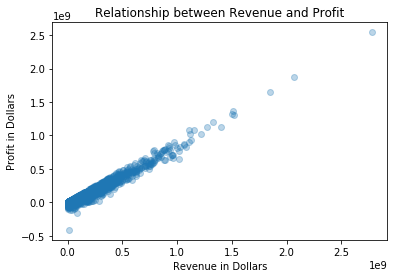

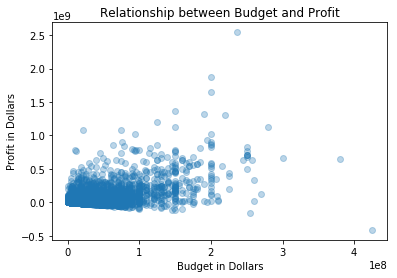

In [24]:
# x-label and y-label
plt.xlabel('Revenue in Dollars')
plt.ylabel('Profit in Dollars')
# title
plt.title('Relationship between Revenue and Profit')
plt.scatter(df['revenue'], df['net_profit'],alpha=0.3)
plt.show()
# x-label and y-label
plt.xlabel('Budget in Dollars')
plt.ylabel('Profit in Dollars')
# title
plt.title('Relationship between Budget and Profit')
plt.scatter(df['budget'], df['net_profit'],alpha=0.3)
plt.show()

>We can see that there\`s a strong relationship between profit and revenue, higher the profit, higher the revenue.
ALSO We can see that there no as such relationship between budget and profits, But yes there are very less flims which didnt make profit when the budget was greater then 20M Dollar.

<a id='4'></a>
### Research Question 4 (Which movie had the greatest and least runtime?)

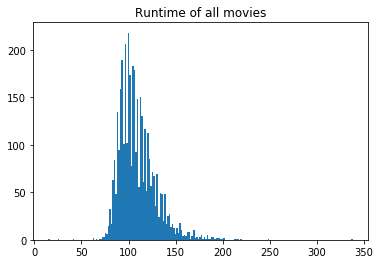

In [25]:
# first we can check the distribution of Runtime of all Movies with Histogram
plt.title('Runtime of all movies')
plt.hist(df['runtime'], bins = 200);
plt.show()

In [26]:
# Runtime Average
df['runtime'].mean()

109.22029060716139

>As we can see the Average runtime for All movies around 110 Minute

In [27]:
df.nlargest(1,'runtime')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit
2107,43434,0.534192,18000000.0,871279.0,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,2010-05-19,35,6.2,2010,-17128721


>Movie with greatest runtime : 
Carlos with 338 minutes record

In [28]:
df.nsmallest(1,'runtime')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,net_profit
5162,24914,0.208637,10.0,5.0,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,15,Science Fiction|Animation,Studio 4Â°C,2003-06-02,16,6.8,2003,-5


> Movie with least runtime : Kid's Story As a 15 Min Record

<a id='9'></a>
### Relationship Between Profit and Vote Average

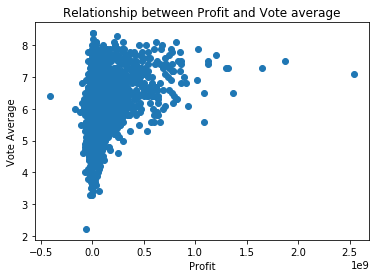

In [29]:
# x-label and y-label
plt.xlabel('Profit')
plt.ylabel('Vote Average')
# title
plt.title('Relationship between Profit and Vote average')
plt.scatter(df['net_profit'], df['vote_average'])
plt.show()

<a id='10'></a> 
### RelationShip between Vote count and Vote Average


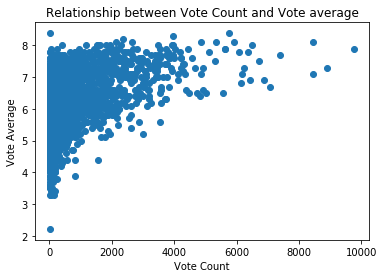

In [30]:
# x-label and y-label
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
# title
plt.title('Relationship between Vote Count and Vote average')
plt.scatter(df['vote_count'], df['vote_average'])
plt.show()

<a id='5'></a>
### Research Question 5 (Relationship between RunTime and Vote Count )

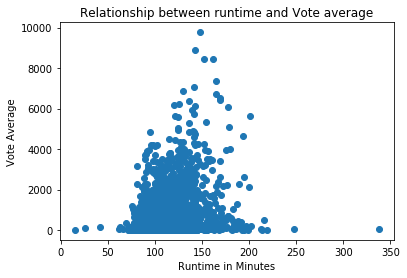

In [31]:
# x-label and y-label
plt.xlabel('Runtime in Minutes')
plt.ylabel('Vote Average')
# title
plt.title('Relationship between runtime and Vote average')
plt.scatter(df['runtime'], df['vote_count'])
plt.show()

>As we can see that most votes goes to the Runtime average for all the movies that\`s around 110 Minutes 

<a id='6'></a>
### Research Question 6 (Relationship between RunTime and Profit )

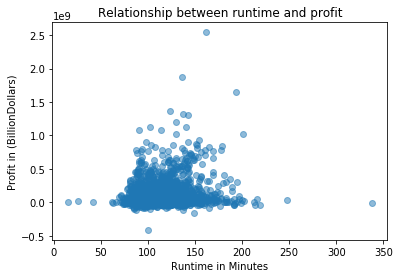

In [32]:
# x-label and y-label
plt.xlabel('Runtime in Minutes')
plt.ylabel('Profit in (BillionDollars)')
# title
plt.title('Relationship between runtime and profit')
plt.scatter(df['runtime'], df['net_profit'],alpha=0.5)
plt.show()

>Most of the movies have runtime in range of 85 to 130 Minutes

<a id='7'></a>
### Research Question 7 (Which genres are most popular ?)

In [33]:
genres_count = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

>So the Top 10 Genres are Drama, Comedy, Action, Thriller, Adventure, Romance, Crime, Family, Scince Fiction, Fantasy
Lets visualize this with a plot

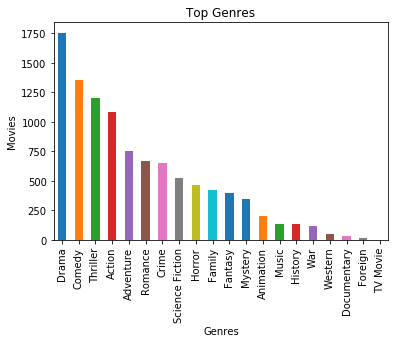

In [34]:
# we can review the answer by diagram graph
diagram = genres_count.plot.bar()
# x-label and y-label
diagram.set_xlabel('Genres')
diagram.set_ylabel('Movies')
# title
diagram.set(title = 'Top Genres')
plt.show()

<a id='8'></a>
### Research Question 8 (Which\`re Top 5 Production Studios?)  

In [35]:
prod_company_count = pd.Series(df['production_companies'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
top_5_studios=prod_company_count.head()
top_5_studios

Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
dtype: int64

>As we can see the Top 5 Studios is :
Universal Pictures  With  329 Movie
Warner Bros.        With  324 Movie 
Paramount Pictures  With  270 Movie
Twentieth Century Fox Film Corporation  With  201 Movie 
Columbia Pictures  With 178 Movie 
##### and here\`s a Plot to visualize the result

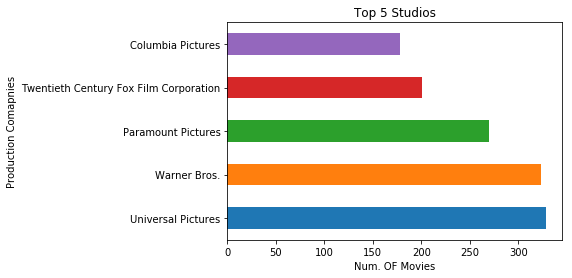

In [36]:
# we can review the answer by diagram graph
diagram = top_5_studios.plot.barh()
# x-label and y-label
diagram.set_xlabel('Num. OF Movies')
diagram.set_ylabel('Production Comapnies')
# title
diagram.set(title = 'Top 5 Studios')
plt.show()

>As we can see the Top production Company is Universal pictures 

<a id='conclusions'></a>
## Conclusions

#### After investigating the Tmdb Movies data set we Figured out that 
1. Top 5 Movies made a profit is :
   1. Avatar (With 2.544 Billion Dollars)
   2. Star Wars: The Force Awakens (With 1.868 Billion Dollar)
   3. Titanic (With 1.645 Billion Dollar)
   4. Jurassic World (With 1.363 Billion Dollar)
   5. Furious 7 (With 1.316 Billion Dollar)
2. Lowest 5 Profitable Movies :
   1. The Warrior's Way (with -413 Million Dollars )
   2. The Lone Ranger (with -165 Million Dollars)
   3. The Alamo (With -119 Million Dollars)
   4. Mars Needs Moms (With -111 Million Dollars)
   5. Brother Bear (with -99 Million Dollar)
3. Movie With the Highest budget :  The Warrior's Way
4. Movie With the Lowest budget  :  Lost & Found
5. Average runtime for All movies around 110 Minute
6. Top 5 Geners for all the time is : 
    1. Drama
    2. Comedy
    3. Thriller
    4. Action
    5. Adventure
7. Top 5 Production Companies    
   1. Universal Pictures                        
   2. Warner Bros.                              
   3. Paramount Pictures                        
   4. Twentieth Century Fox Film Corporation    
   5. Columbia Pictures            



<a id='Data Limitation'></a>
## Data Limitation

The conclusion is not full proof that given the above requirement the movie will be a big hit but it can be.

Also, we also lost some of the data in the data cleaning steps where we dont know the revenue and budget of the movie, which has affected our analysis.

This conclusion is not error proof.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0